# Intro to Pandas DataFrame

## Pandas
* Powerful data analysis toolkit for python
* Resembles R data.frame, data.table, and dplyr
* Treats data in a relational way with named elements like columns
* Can perform database like functions (selects, joins, groups, etc.)
* Easy access to powerful statistical methods
* Easy access to rich plots

## Quick look at the data

In [1]:
# Import packages
import numpy as np
import pandas as pd

# Read in some data
heart = pd.read_csv("http://faculty.washington.edu/kenrice/heartgraphs/nhaneslarge.csv", sep=",", na_values=".")

### What type of object is it?

In [2]:
type(heart)

pandas.core.frame.DataFrame

### Look at the data
#### First five rows

In [3]:
# First 5 rows
heart.head()

,BPXSAR,BPXDAR,BPXDI1,BPXDI2,race_ethc,gender,DR1TFOLA,RIAGENDR,BMXBMI,RIDAGEYR
0,108.000000,56.000000,56.0,58.0,Other,Male,434,1,25.83,65
1,117.333333,60.000000,56.0,64.0,Hispanic,Male,241,1,25.73,74
2,120.000000,82.666667,80.0,86.0,White non-Hispanic,Male,380,1,24.49,54
3,88.000000,52.000000,52.0,NaN,White non-Hispanic,Female,152,2,20.76,9
4,150.666667,96.000000,100.0,94.0,Black non-Hispanic,Male,422,1,24.63,49


#### Last three rows

In [4]:
# Last 3 rows
heart.tail(3)

,BPXSAR,BPXDAR,BPXDI1,BPXDI2,race_ethc,gender,DR1TFOLA,RIAGENDR,BMXBMI,RIDAGEYR
997,144.0,70.0,70.0,NaN,White non-Hispanic,Female,195,2,31.44,85
998,120.0,80.0,84.0,80.0,White non-Hispanic,Male,624,1,28.23,34
999,134.0,88.0,94.0,88.0,White non-Hispanic,Male,753,1,22.21,50


#### Just the columns

In [5]:
heart.columns

Index(['BPXSAR', 'BPXDAR', 'BPXDI1', 'BPXDI2', 'race_ethc', 'gender',
       'DR1TFOLA', 'RIAGENDR', 'BMXBMI', 'RIDAGEYR'],
      dtype='object')

#### Object-oriented: each operation returns a data.frame

In [6]:
heart.head(10).tail(5)

,BPXSAR,BPXDAR,BPXDI1,BPXDI2,race_ethc,gender,DR1TFOLA,RIAGENDR,BMXBMI,RIDAGEYR
5,99.000000,62.0,66.0,62.0,White non-Hispanic,Male,319,1,21.35,69
6,107.000000,57.0,54.0,NaN,White non-Hispanic,Female,1072,2,24.20,25
7,114.666667,58.0,58.0,60.0,White non-Hispanic,Female,821,2,20.81,29
8,104.666667,72.0,70.0,70.0,White non-Hispanic,Female,435,2,20.06,19
9,101.000000,58.0,66.0,56.0,White non-Hispanic,Female,231,2,23.83,13


## Summary statistics

In [7]:
heart.describe()

,BPXSAR,BPXDAR,BPXDI1,BPXDI2,DR1TFOLA,RIAGENDR,BMXBMI,RIDAGEYR
count,1000.000000,1000.000000,905.000000,832.000000,1000.0000,1000.00000,991.000000,1000.000000
mean,119.932667,68.021000,68.333702,68.442308,409.2650,1.50000,27.077619,40.109000
std,17.996055,13.951905,14.371156,14.041936,242.0019,0.50025,6.552778,20.379363
min,82.000000,0.000000,0.000000,0.000000,0.0000,1.00000,14.240000,8.000000
25%,108.000000,60.000000,60.000000,60.000000,250.0000,1.00000,22.520000,21.750000
50%,117.333333,69.000000,68.000000,70.000000,354.0000,1.50000,26.550000,40.000000
75%,130.000000,77.000000,78.000000,78.000000,492.2500,2.00000,30.860000,54.000000
max,216.000000,112.000000,110.000000,114.000000,1906.0000,2.00000,57.410000,85.000000


### Aggregates

In [8]:
heart.groupby('race_ethc').agg({'RIDAGEYR': [np.size, np.median]})

RIDAGEYR       
                       size median
race_ethc                         
Black non-Hispanic      102   33.0
Hispanic                114   34.5
Other                    68   37.0
White non-Hispanic      716   43.0

## Selecting data (slicing)

In [9]:
# Rows 5...10
heart[5:10]

,BPXSAR,BPXDAR,BPXDI1,BPXDI2,race_ethc,gender,DR1TFOLA,RIAGENDR,BMXBMI,RIDAGEYR
5,99.000000,62.0,66.0,62.0,White non-Hispanic,Male,319,1,21.35,69
6,107.000000,57.0,54.0,NaN,White non-Hispanic,Female,1072,2,24.20,25
7,114.666667,58.0,58.0,60.0,White non-Hispanic,Female,821,2,20.81,29
8,104.666667,72.0,70.0,70.0,White non-Hispanic,Female,435,2,20.06,19
9,101.000000,58.0,66.0,56.0,White non-Hispanic,Female,231,2,23.83,13


In [10]:
# Single column
heart['BPXDAR'].head()

0    56.000000
1    60.000000
2    82.666667
3    52.000000
4    96.000000
Name: BPXDAR, dtype: float64

In [11]:
# Multiple columns
heart[['BPXDAR','race_ethc','gender']].head()

,BPXDAR,race_ethc,gender
0,56.000000,Other,Male
1,60.000000,Hispanic,Male
2,82.666667,White non-Hispanic,Male
3,52.000000,White non-Hispanic,Female
4,96.000000,Black non-Hispanic,Male


In [12]:
# Row indices and columns
heart.loc[20:30,['BPXDAR','race_ethc','gender']]

,BPXDAR,race_ethc,gender
20,82.000000,Black non-Hispanic,Female
21,73.000000,White non-Hispanic,Male
22,86.000000,White non-Hispanic,Female
23,69.333333,White non-Hispanic,Male
24,87.333333,Hispanic,Male
25,52.000000,White non-Hispanic,Male
26,74.000000,Other,Female
27,43.000000,White non-Hispanic,Male
28,88.000000,White non-Hispanic,Female
29,54.000000,White non-Hispanic,Male


In [13]:
# Selecting on criteria
# NOTE use of "." dot notation
heart[(heart.DR1TFOLA >300) & (heart.gender =='Male')].head(10)

,BPXSAR,BPXDAR,BPXDI1,BPXDI2,race_ethc,gender,DR1TFOLA,RIAGENDR,BMXBMI,RIDAGEYR
0,108.000000,56.000000,56.0,58.0,Other,Male,434,1,25.83,65
2,120.000000,82.666667,80.0,86.0,White non-Hispanic,Male,380,1,24.49,54
4,150.666667,96.000000,100.0,94.0,Black non-Hispanic,Male,422,1,24.63,49
5,99.000000,62.000000,66.0,62.0,White non-Hispanic,Male,319,1,21.35,69
10,136.000000,82.000000,NaN,80.0,White non-Hispanic,Male,498,1,22.27,31
11,144.000000,90.000000,90.0,NaN,White non-Hispanic,Male,433,1,45.98,54
15,109.333333,73.333333,72.0,74.0,Black non-Hispanic,Male,703,1,18.70,16
23,117.333333,69.333333,66.0,72.0,White non-Hispanic,Male,454,1,23.61,51
24,134.666667,87.333333,92.0,82.0,Hispanic,Male,508,1,32.89,38
25,121.333333,52.000000,54.0,50.0,White non-Hispanic,Male,646,1,24.88,42


## Instant plotting

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4318ab85f8>,
      dtype=object)

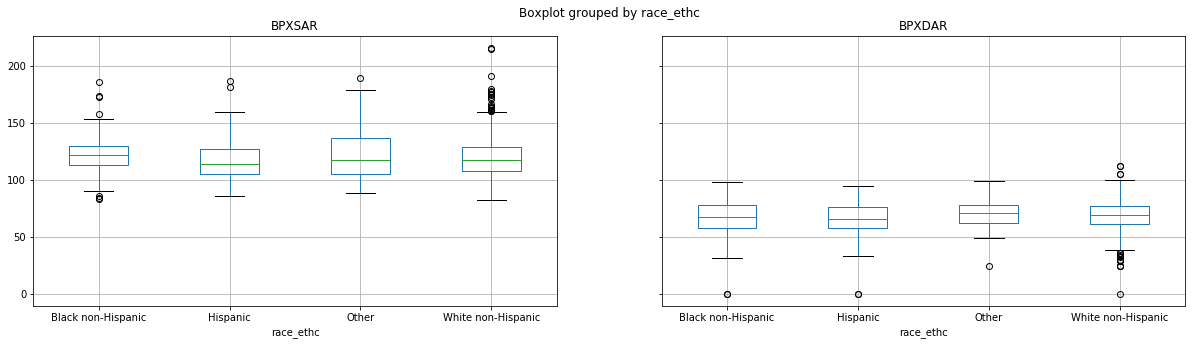

In [14]:
%matplotlib inline
import matplotlib.pylab as plt

heart.boxplot(column=['BPXSAR', 'BPXDAR'], by='race_ethc', figsize=(20,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4317eeb908>,
      dtype=object)

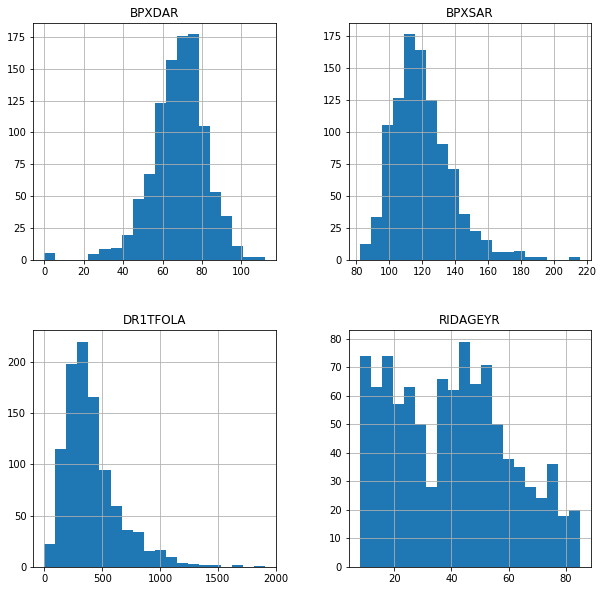

In [18]:
heart.hist(column=['BPXSAR', 'BPXDAR', 'DR1TFOLA', 'RIDAGEYR'], bins=20, figsize=(10,10))